In [21]:
import os
import socket
import subprocess
import pandas as pd
import io
from contextlib import redirect_stdout
import itertools
import warnings
from datetime import datetime
import time
import timeout_decorator
import numpy as np
import matplotlib.pyplot as plt



In [2]:
def islocal(): return socket.gethostname()=="rc-idsia-macBook.local"
def isserver(): return socket.gethostname()=="ec6120930b2d"
def strdate(): return datetime.today().strftime('%Y-%m-%d-%H-%M-%S')


In [3]:
if islocal():
    prj_path = "/Users/rcabanas/GoogleDrive/IDSIA/causality/dev/crema/CreMA"
    os.environ['JAVA_HOME'] = "/Library/Java/JavaVirtualMachines/openjdk-12.0.1.jdk/Contents/Home"
elif isserver():
    prj_path="/home/rcabanas/work_java_crema/crema/CreMA"
else:
    warnings.warn("Unknown server, set prj_path variable manually.")
os.chdir(prj_path)
!pwd

/home/rcabanas/work_java_crema/crema/CreMA


In [4]:
exp_folder = f"{prj_path}/papers/pgm20/experiments/"
log_folder = f"{exp_folder}/logs/"
res_folder = f"{exp_folder}/results/"
jarfile=f"{prj_path}/target/CreMA-0.1.1-SNAPSHOT-jar-with-dependencies.jar"

In [5]:
!mvn install:install-file -Dfile=./external/lpsolve55j.jar -DgroupId=net.sf.lpsolve -DartifactId=lp_solve -Dversion=5.5.2 -Dpackaging=jar

[INFO] Scanning for projects...
[WARNING] 
[WARNING] Some problems were encountered while building the effective model for ch.idsia:CreMA:jar:0.1.1-SNAPSHOT
[WARNING] 'dependencies.dependency.(groupId:artifactId:type:classifier)' must be unique: org.apache.commons:commons-math3:jar -> duplicate declaration of version 3.6.1 @ line 125, column 15
[WARNING] 
[WARNING] It is highly recommended to fix these problems because they threaten the stability of your build.
[WARNING] 
[WARNING] For this reason, future Maven versions might no longer support building such malformed projects.
[WARNING] 
[INFO] 
[INFO] ---------------------------< ch.idsia:CreMA >---------------------------
[INFO] Building Credal Model Algorithms 0.1.1-SNAPSHOT
[INFO] --------------------------------[ jar ]---------------------------------
[INFO] 
[INFO] --- maven-install-plugin:2.4:install-file (default-cli) @ CreMA ---
[INFO] Installing /home/rcabanas/work_java_crema/crema/CreMA/external/lpsolve55j.jar to /home/rcaba

In [6]:
!mvn install:install-file -Dfile=./external/polco.jar -DgroupId=ch.javasoft.polco -DartifactId=polco -Dversion=4.7.1 -Dpackaging=jar

[INFO] Scanning for projects...
[WARNING] 
[WARNING] Some problems were encountered while building the effective model for ch.idsia:CreMA:jar:0.1.1-SNAPSHOT
[WARNING] 'dependencies.dependency.(groupId:artifactId:type:classifier)' must be unique: org.apache.commons:commons-math3:jar -> duplicate declaration of version 3.6.1 @ line 125, column 15
[WARNING] 
[WARNING] It is highly recommended to fix these problems because they threaten the stability of your build.
[WARNING] 
[WARNING] For this reason, future Maven versions might no longer support building such malformed projects.
[WARNING] 
[INFO] 
[INFO] ---------------------------< ch.idsia:CreMA >---------------------------
[INFO] Building Credal Model Algorithms 0.1.1-SNAPSHOT
[INFO] --------------------------------[ jar ]---------------------------------
[INFO] 
[INFO] --- maven-install-plugin:2.4:install-file (default-cli) @ CreMA ---
[INFO] Installing /home/rcabanas/work_java_crema/crema/CreMA/external/polco.jar to /home/rcabanas/.

In [7]:
!mvn clean compile assembly:single

[INFO] Scanning for projects...
[WARNING] 
[WARNING] Some problems were encountered while building the effective model for ch.idsia:CreMA:jar:0.1.1-SNAPSHOT
[WARNING] 'dependencies.dependency.(groupId:artifactId:type:classifier)' must be unique: org.apache.commons:commons-math3:jar -> duplicate declaration of version 3.6.1 @ line 125, column 15
[WARNING] 
[WARNING] It is highly recommended to fix these problems because they threaten the stability of your build.
[WARNING] 
[WARNING] For this reason, future Maven versions might no longer support building such malformed projects.
[WARNING] 
[INFO] 
[INFO] ---------------------------< ch.idsia:CreMA >---------------------------
[INFO] Building Credal Model Algorithms 0.1.1-SNAPSHOT
[INFO] --------------------------------[ jar ]---------------------------------
[INFO] 
[INFO] --- maven-clean-plugin:2.5:clean (default-clean) @ CreMA ---
[INFO] Deleting /home/rcabanas/work_java_crema/crema/CreMA/target
[INFO] 
[INFO] --- maven-resources-plugi

In [8]:
@timeout_decorator.timeout(20*60)
def run_java(jarfile, javafile):
    cmd=f"java -cp {jarfile} {javafile}"
    result =subprocess.run(cmd, universal_newlines = True, shell=True,stdout = subprocess.PIPE)
    print(result.stdout)
    return result

# ChainNonMarkovian 6 5 1 -1 0 CCALP 1234
def run_chain(model, N, exovarsize, target, obsvar, dovar, method, seed):
    javafile = f"{exp_folder}/RunExperiments.java {model} {N} {exovarsize} {target} {obsvar} {dovar} {method} {seed}"  
    try:
        result = run_java(jarfile, javafile)
        output = [float(x) for x in result.stdout.splitlines()[-1].split(",")]
    except:
        output = [float("inf"),float("inf"),float("nan")]
        
    return output

def run_chain_markovian(N=4, exovarsize=6, target=None, obsvar=-1, dovar=-1, method="CVE", seed=1234):
    return run_chain("ChainMarkovian", N, exovarsize, target or N-1, obsvar, dovar, method, seed)

def run_chain_nonmarkovian(N=4, exovarsize=6, target=None, obsvar=-1, dovar=-1, method="CVE", seed=1234):
    return run_chain("ChainNonMarkovian", N, exovarsize, target or N-1, obsvar, dovar, method, seed)


In [9]:
run_chain_markovian(N=5, dovar=0, method="CCVE")


ChainMarkovian
   N=5 exovarsize=6 target=4 obsvar=-1 dovar=0 method=CCVE seed=1234
Running experiments...
Warm-up #0 in 660.77 ms.
Warm-up #1 in 208.253 ms.
Warm-up #2 in 186.881 ms.
Measurement #0 in 170.403 ms. size=28.812
Measurement #1 in 161.031 ms. size=37.575
Measurement #2 in 171.306 ms. size=27.413
Measurement #3 in 137.222 ms. size=23.452
Measurement #4 in 138.629 ms. size=16.707
Measurement #5 in 144.382 ms. size=24.752
Measurement #6 in 145.003 ms. size=25.375
Measurement #7 in 139.458 ms. size=25.2
Measurement #8 in 123.043 ms. size=24.943
Measurement #9 in 126.486 ms. size=23.926
145.6963,25.815499999999997,0.0



[145.6963, 25.815499999999997, 0.0]

In [10]:
run_chain_nonmarkovian(N=3, exovarsize=6, method="CCVE", seed=543)


ChainNonMarkovian
   N=3 exovarsize=6 target=2 obsvar=-1 dovar=-1 method=CCVE seed=543
Running experiments...
Warm-up #0 in 450.41 ms.
Warm-up #1 in 110.379 ms.
Warm-up #2 in 92.204 ms.
Measurement #0 in 65.535 ms. size=4.643
Measurement #1 in 62.419 ms. size=3.994
Measurement #2 in 58.008 ms. size=4.047
Measurement #3 in 56.183 ms. size=2.726
Measurement #4 in 63.431 ms. size=2.604
Measurement #5 in 51.932 ms. size=2.4
Measurement #6 in 51.652 ms. size=2.04
Measurement #7 in 54.299 ms. size=2.179
Measurement #8 in 55.989 ms. size=2.581
Measurement #9 in 56.637 ms. size=2.569
57.60850000000001,2.9783,0.0



[57.60850000000001, 2.9783, 0.0]

In [11]:
def run_experiments(f, args, outkeys=("time", "query_time", "size")):

    result = pd.DataFrame(columns=list(args.keys())+list(outkeys))
    log_file = f"{log_folder}{strdate()}_{f.__name__}.txt"

    for v in itertools.product(*list(args.values())):
        argsv = dict(zip(list(args.keys()), v))
        strio = io.StringIO()
        with open(log_file, 'a+') as logger:
            with redirect_stdout(strio):
                outvals = f(**argsv)
            logger.write(strio.getvalue())
        result = result.append({**argsv, **dict(zip(list(outkeys), outvals))}, ignore_index=True)
        print(dict(result.iloc[-1]))
    
    return result

In [36]:
args = {"N":list(range(5,15)), "exovarsize":[6], "dovar":[0], "seed":[1234], "method":["CVE", "CCVE","CCALP", "CCALPeps"]}

In [37]:
results1 = run_experiments(run_chain_markovian, args)
res_file = f"{res_folder}{strdate()}_chain_markovian.csv"
results1.to_csv(res_file)
results1

{'N': 5, 'exovarsize': 6, 'dovar': 0, 'seed': 1234, 'method': 'CVE', 'time': 1.9111999999999998, 'query_time': 1.9044, 'size': 0.0}
{'N': 5, 'exovarsize': 6, 'dovar': 0, 'seed': 1234, 'method': 'CCVE', 'time': 161.3318, 'query_time': 24.6545, 'size': 0.0}
{'N': 5, 'exovarsize': 6, 'dovar': 0, 'seed': 1234, 'method': 'CCALP', 'time': 292.3183, 'query_time': 289.98519999999996, 'size': 0.0}
{'N': 5, 'exovarsize': 6, 'dovar': 0, 'seed': 1234, 'method': 'CCALPeps', 'time': 2481.5999, 'query_time': 2478.9799, 'size': 5.366085633262685e-06}
{'N': 6, 'exovarsize': 6, 'dovar': 0, 'seed': 1234, 'method': 'CVE', 'time': 2.7359, 'query_time': 2.7268999999999997, 'size': 0.0}
{'N': 6, 'exovarsize': 6, 'dovar': 0, 'seed': 1234, 'method': 'CCVE', 'time': 247.75099999999998, 'query_time': 99.485, 'size': 0.0}
{'N': 6, 'exovarsize': 6, 'dovar': 0, 'seed': 1234, 'method': 'CCALP', 'time': 360.9872, 'query_time': 358.398, 'size': 0.0}
{'N': 6, 'exovarsize': 6, 'dovar': 0, 'seed': 1234, 'method': 'CCALPe

,N,exovarsize,dovar,seed,method,time,query_time,size
0,5,6,0,1234,CVE,1.9112,1.9044,0.000000e+00
1,5,6,0,1234,CCVE,161.3318,24.6545,0.000000e+00
2,5,6,0,1234,CCALP,292.3183,289.9852,0.000000e+00
3,5,6,0,1234,CCALPeps,2481.5999,2478.9799,5.366086e-06
4,6,6,0,1234,CVE,2.7359,2.7269,0.000000e+00
5,6,6,0,1234,CCVE,247.7510,99.4850,0.000000e+00
6,6,6,0,1234,CCALP,360.9872,358.3980,0.000000e+00
7,6,6,0,1234,CCALPeps,3945.1761,3942.0334,6.170813e-06
8,7,6,0,1234,CVE,7.6168,7.6067,0.000000e+00
9,7,6,0,1234,CCVE,643.4260,474.5126,0.000000e+00


In [47]:
args = {"N":list(range(5,30,2)), "exovarsize":[6], "dovar":[0], "seed":[1234], "method":["CVE", "CCVE","CCALP", "CCALPeps"]}
results2 = run_experiments(run_chain_nonmarkovian, args)
res_file = f"{res_folder}{strdate()}_chain_nonmarkovian.csv"
results2.to_csv(res_file)
results2

{'N': 5, 'exovarsize': 6, 'dovar': 0, 'seed': 1234, 'method': 'CVE', 'time': 1.3782, 'query_time': 1.3723, 'size': 0.0}
{'N': 5, 'exovarsize': 6, 'dovar': 0, 'seed': 1234, 'method': 'CCVE', 'time': 84.0235, 'query_time': 8.162600000000001, 'size': 0.0}
{'N': 5, 'exovarsize': 6, 'dovar': 0, 'seed': 1234, 'method': 'CCALP', 'time': 278.9444, 'query_time': 276.73490000000004, 'size': 1.1102230246251565e-16}
{'N': 5, 'exovarsize': 6, 'dovar': 0, 'seed': 1234, 'method': 'CCALPeps', 'time': 2014.2675, 'query_time': 2011.7436000000002, 'size': 4.810262641674612e-06}
{'N': 7, 'exovarsize': 6, 'dovar': 0, 'seed': 1234, 'method': 'CVE', 'time': 2.2523, 'query_time': 2.246, 'size': 0.0}
{'N': 7, 'exovarsize': 6, 'dovar': 0, 'seed': 1234, 'method': 'CCVE', 'time': 119.0569, 'query_time': 18.7376, 'size': 0.0}
{'N': 7, 'exovarsize': 6, 'dovar': 0, 'seed': 1234, 'method': 'CCALP', 'time': 400.4049, 'query_time': 397.8894, 'size': 0.0}
{'N': 7, 'exovarsize': 6, 'dovar': 0, 'seed': 1234, 'method': 'CC

,N,exovarsize,dovar,seed,method,time,query_time,size
0,5,6,0,1234,CVE,1.3782,1.3723,0.000000e+00
1,5,6,0,1234,CCVE,84.0235,8.1626,0.000000e+00
2,5,6,0,1234,CCALP,278.9444,276.7349,1.110223e-16
3,5,6,0,1234,CCALPeps,2014.2675,2011.7436,4.810263e-06
4,7,6,0,1234,CVE,2.2523,2.2460,0.000000e+00
5,7,6,0,1234,CCVE,119.0569,18.7376,0.000000e+00
6,7,6,0,1234,CCALP,400.4049,397.8894,0.000000e+00
7,7,6,0,1234,CCALPeps,4169.1487,4166.6120,7.566370e-06
8,9,6,0,1234,CVE,3.7227,3.7074,0.000000e+00
9,9,6,0,1234,CCVE,181.0402,79.9153,0.000000e+00


In [39]:
methods = np.unique(results1["method"].to_numpy())

In [40]:
results1.filter(items=["N","method","time"])

,N,method,time
0,5,CVE,1.9112
1,5,CCVE,161.3318
2,5,CCALP,292.3183
3,5,CCALPeps,2481.5999
4,6,CVE,2.7359
5,6,CCVE,247.7510
6,6,CCALP,360.9872
7,6,CCALPeps,3945.1761
8,7,CVE,7.6168
9,7,CCVE,643.4260


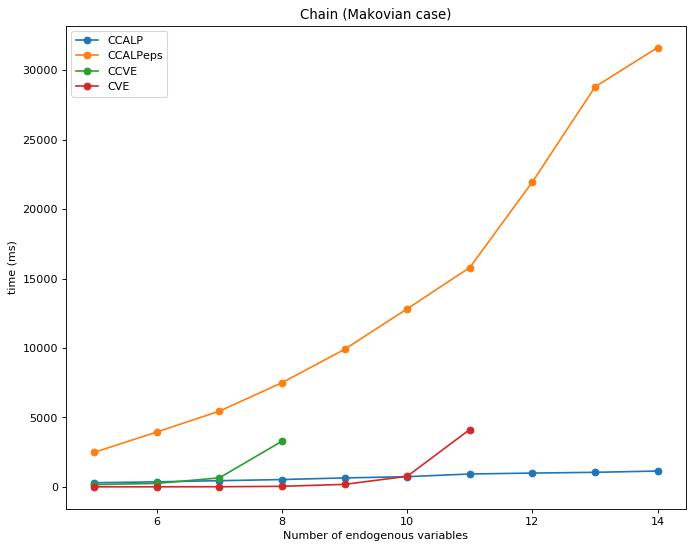

In [75]:
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

N = np.unique(results1["N"].to_numpy())

for m in methods:
    #if m not in ["CCALPeps"]:
        data = results1.query(f"method=='{m}'").filter(items=["time"]).to_numpy()
        plt.plot(N, data, marker='o', label=m)
        plt.legend()
        #ax1.set_yscale('log')
        
plt.ylabel("time (ms)")
plt.xlabel("Number of endogenous variables")

plt.title("Chain (Makovian case)")

plt.show()

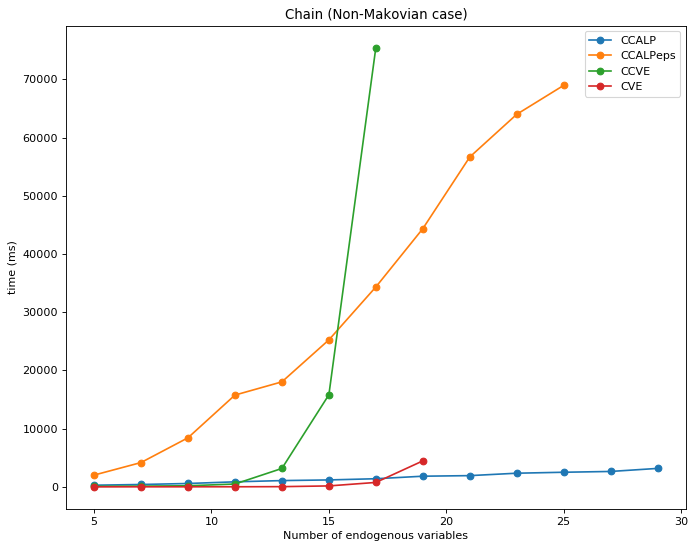

In [76]:
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

N = np.unique(results2["N"].to_numpy())


for m in methods:
    #if m not in ["CCALPeps"]:

        data = results2.query(f"method=='{m}'").filter(items=["time"]).to_numpy()
        plt.plot(N, data, marker='o', label=m)

        #data = results2.query(f"method=='{m}'").filter(items=["query_time"]).to_numpy()
        #ax2.plot(N, data, marker='o', label=m)
        #ax1.set_yscale('log')

        plt.legend()   
        
plt.ylabel("time (ms)")
plt.title("Chain (Non-Makovian case)")
plt.xlabel("Number of endogenous variables")

fig.show()

In [46]:
list(range(5,30,2))

[5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

In [ ]:
args = {"N":list(range(5,15,2)), "exovarsize":[6], "dovar":[0], "seed":[1234], "method":["CVE", "CCVE","CCALP", "CCALPeps"]}